In [0]:
!pip install demoji
!pip install emoji
!pip install Unidecode
import pandas as pd
import sys
import string  
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from sklearn.metrics import classification_report
import numpy as np
import nltk
nltk.download('wordnet')
import cv2
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.image as mpimg
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score, r2_score
from os import listdir
from os.path import isfile, join
from sklearn import datasets, svm, metrics
from bs4 import BeautifulSoup
import re
from unidecode import unidecode
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
from keras.utils import to_categorical
import demoji
import emoji
from keras.models import Sequential
from keras.layers import Embedding,Bidirectional,Dense,Conv1D,Flatten,LSTM,GlobalMaxPooling1D,Dropout
from keras.preprocessing.text import Tokenizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam


     |████████████████████████████████| 51kB 2.0MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42176 sha256=5bfaeb3ee6d91bacd0ffe9b2fecf94f7080bdea740128c0a27f464effda20612
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji
     |████████████████████████████████| 245kB 3.4MB/s 
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Using TensorFlow backend.


In [0]:
df = pd.read_csv('/content/drive/My Drive/Data_4/1fe720be-90e4-4e06-9b52-9de93e0ea937_train.csv')

In [0]:
Label = df['labels']
df[df.labels == 0].head(100)
df[df.labels == 0].head(100)
print(df[0:85])

                                                 text  labels
0   @realDonaldTrump This is one of the worst time...       0
1   How about the crowd in Oval in today's #AUSvIN...       1
2   @skroskz @shossy2 @JoeBiden Biden &amp; his so...       0
3   #etsy shop: Benedict Donald so called presiden...       1
4   @realDonaldTrump Good build a wall around Arka...       0
..                                                ...     ...
80  @cdnfp @SecPompeo @StateDept @realDonaldTrump ...       0
81  #DhoniKeepTheGlove  @ICC @cricketworldcup   I ...       1
82  😂Forget Parsees Save 😂 #CongBachaoRahulHatao #...       0
83  Kamala Harris: Trump is a 'clear and present t...       0
84  Some Cars its wiser to stay away from!!  😣😔😥.....       1

[85 rows x 2 columns]


In [0]:
example1 = BeautifulSoup(df.text[78], 'lxml')
print(Label)

0       0
1       1
2       0
3       1
4       0
       ..
5261    1
5262    1
5263    1
5264    0
5265    1
Name: labels, Length: 5266, dtype: int64


In [0]:
t = example1.get_text()
a = df[84:85]
print(a)
example2 = BeautifulSoup(df.text[84], 'lxml')
print(example2.get_text())

                                                 text  labels
84  Some Cars its wiser to stay away from!!  😣😔😥.....       1
Some Cars its wiser to stay away from!!  😣😔😥... 😅😁😁😁😁😏  #fear #not #eyes #open #peeled #set #up #enemy #truly #beware #liars #molestors #rapist #all #shit #eat #eaters #tire #not #solid #soldier #God #first https://t.co/AEILxDvfFG


In [0]:
import demoji
import emoji
demoji.download_codes()
dictionary = demoji.findall(t)
print(emoji.demojize(t))
from emoji.unicode_codes import UNICODE_EMOJI
unicode_text = t.encode('unicode-escape')
print(unicode_text)

... OK (Got response in 0.11 seconds)
Writing emoji data to /root/.demoji/codes.json ...
... OK
Happy #JohnMCainDay #JohnMcCainDayJune14th #JohnMcCainAmericanHero :United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_States::United_Stat

In [0]:
re.sub(r'@[A-Za-z0-9]+','',df.text[343])

"  #Sad I saw a portapotty full to the top at work today &amp; thought of you trump &amp; I realized something. The full portapotty has less shit in it than you &amp; it does it's job well. You could learn from that. #trumpdeathcamps  #Trump2020 #TrumpTrain #fucktrump  #Fucktrump"

In [0]:
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
ps = PorterStemmer() 
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    wordss = []
    for w in wordss: 
      words.append(lemmatizer.lemmatize(w)) 
    S = (" ".join(words)).strip()
    return S

def PreProcessing(Data):
    #print('shape - ', Data.shape[0])
    #print(Data.iloc[0,:])
    for i in range(Data.shape[0]):
        before = Data
        #remove numbers
        feature = Data.iloc[i,:]

        feature = ''.join(i for i in feature if not i.isdigit())
        #remove punctuation
        exc = set(string.punctuation)
        feature = ''.join(ch for ch in feature if ch not in exc)
        #print(feature)
        #encoding to ascii
        feature = unidecode(feature)
        feature = feature.lower()
        #extra space
        feature = feature.strip()
        feature.encode('ascii', 'ignore').decode('ascii')
        #tokenize
        tokenizer = RegexpTokenizer("\w+|\d\.]+|\S+")
        tokens = tokenizer.tokenize(feature)
        # stopWords = set(stopwords.words('english'))
        # New_Data = [w for w in tokens if not w in tokens]
        Data.iloc[i,:] = ' '.join([str(w) for w in tokens])
    return Data

In [0]:
testing = df.text[:100]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
len(test_result)


100

In [0]:
 test_result = pd.DataFrame(test_result, columns=['text'])
 test_result

,text
0,this is one of the worst times to be american ...
1,how about the crowd in oval in today s ausvind...
2,biden his son hunter took advantage of their p...
3,etsy shop benedict donald so called president ...
4,good build a wall around arkansas fucktrump fu...
...,...
95,some much needed clarification after trumps un...
96,is putin s puppet trumpsworsethannixon trumpmu...
97,narendra modi sir please look into bihar child...
98,but he didn t trumpsworsethannixon trumpisatra...


In [0]:

test_result = PreProcessing(test_result)

In [0]:
test_result

,text
0,this is one of the worst times to be american ...
1,how about the crowd in oval in today s ausvind...
2,biden his son hunter took advantage of their p...
3,etsy shop benedict donald so called president ...
4,good build a wall around arkansas fucktrump fu...
...,...
95,some much needed clarification after trumps un...
96,is putin s puppet trumpsworsethannixon trumpmu...
97,narendra modi sir please look into bihar child...
98,but he didn t trumpsworsethannixon trumpisatra...


#ACTUAL DATA CLEANING

In [0]:
class cleaning:
  lemmatizer = WordNetLemmatizer()
  tok = WordPunctTokenizer()
  pat1 = r'@[A-Za-z0-9]+'
  pat2 = r'https?://[A-Za-z0-9./]+'
  combined_pat = r'|'.join((pat1, pat2))

  def tweet_cleaner(self,text):
      text = emoji.demojize(text)
      soup = BeautifulSoup(text, 'lxml')
      souped = soup.get_text()
      stripped = re.sub(self.combined_pat, '', souped)
      try:
          clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
      except:
          clean = stripped
      letters_only = re.sub("[^a-zA-Z]", " ", clean)
      letters_only = re.sub('([A-Z][a-z]+)', r' \1', re.sub('([A-Z]+)', r' \1', letters_only))
      lower_case = letters_only.lower()
      words = self.tok.tokenize(lower_case)
      wordss = []
      for w in words: 
        wordss.append(self.lemmatizer.lemmatize(w)) 
      S = (" ".join(wordss)).strip()
      return S

  def PreProcessing(self,Data):
      for i in range(Data.shape[0]):
          before = Data
          feature = Data.iloc[i,:]
          feature = ''.join(i for i in feature if not i.isdigit())
          exc = set(string.punctuation)
          feature = ''.join(ch for ch in feature if ch not in exc)
          feature = unidecode(feature)
          feature = feature.lower()
          feature = feature.strip()
          feature.encode('ascii', 'ignore').decode('ascii')
          tokenizer = RegexpTokenizer("\w+|\d\.]+|\S+")
          tokens = tokenizer.tokenize(feature)
          New_Data = tokens
          Data.iloc[i,:] = ' '.join([str(w) for w in New_Data])
      return Data

  def All_clean(self,Data):
    test_result = []
    for t in Data.text:
      test_result.append(self.tweet_cleaner(t))
    test_result = pd.DataFrame(test_result, columns=['text'])
    # test_result = self.PreProcessing(test_result)
    return test_result


In [0]:
embed_num_dims = 100
max_seq_len = 10000
cls = cleaning()
clean_data = cls.All_clean(df)
print(clean_data)
sequences = clean_data['text']

                                                   text
0     this is one of the worst time to be american b...
1     how about the crowd in oval in today s au sv i...
2     biden his son hunter took advantage of their p...
3     etsy shop benedict donald so called president ...
4     good build a wall around arkansas fuck trump f...
...                                                 ...
5261  should allow m dhoni to keep glove it is attac...
5262  trump on avoiding movie pirating of course you...
5263  i noticed recently jamie oliver s restaurant c...
5264  team india geared up is okay what s on the glo...
5265  is this the same piece of paper mc carthy used...

[5266 rows x 1 columns]


In [0]:
tokenizer = Tokenizer(num_words = 4000)
tokenizer.fit_on_texts(sequences)
sequence = tokenizer.texts_to_sequences(sequences)
index_of_words = tokenizer.word_index
print(len(index_of_words))
padded_seq = pad_sequences(sequence , maxlen =max_seq_len)


11681


In [0]:
print(padded_seq.shape)
Y = df['labels']
X_train,X_test,Y_train1,Y_test1 = train_test_split(padded_seq,Y ,train_size = 0.80)

(5266, 10000)


In [0]:
Y_train1.shape

(4212,)

In [0]:
print('Indexing word vectors.')

embeddings_index = {}
f = open('/content/drive/My Drive/glove/glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Indexing word vectors.
Found 400000 word vectors.


In [0]:
embeddings_index['good']

array([-0.030769 ,  0.11993  ,  0.53909  , -0.43696  , -0.73937  ,
       -0.15345  ,  0.081126 , -0.38559  , -0.68797  , -0.41632  ,
       -0.13183  , -0.24922  ,  0.441    ,  0.085919 ,  0.20871  ,
       -0.063582 ,  0.062228 , -0.051234 , -0.13398  ,  1.1418   ,
        0.036526 ,  0.49029  , -0.24567  , -0.412    ,  0.12349  ,
        0.41336  , -0.48397  , -0.54243  , -0.27787  , -0.26015  ,
       -0.38485  ,  0.78656  ,  0.1023   , -0.20712  ,  0.40751  ,
        0.32026  , -0.51052  ,  0.48362  , -0.0099498, -0.38685  ,
        0.034975 , -0.167    ,  0.4237   , -0.54164  , -0.30323  ,
       -0.36983  ,  0.082836 , -0.52538  , -0.064531 , -1.398    ,
       -0.14873  , -0.35327  , -0.1118   ,  1.0912   ,  0.095864 ,
       -2.8129   ,  0.45238  ,  0.46213  ,  1.6012   , -0.20837  ,
       -0.27377  ,  0.71197  , -1.0754   , -0.046974 ,  0.67479  ,
       -0.065839 ,  0.75824  ,  0.39405  ,  0.15507  , -0.64719  ,
        0.32796  , -0.031748 ,  0.52899  , -0.43886  ,  0.6740

In [0]:
embedding_matrix = np.zeros((len(index_of_words) + 1, embed_num_dims))

tokens = []
labels = []

for word,i in index_of_words.items():
    temp = embeddings_index.get(word)
    if temp is not None:
        embedding_matrix[i] = temp
        

In [0]:
embedding_matrix.shape

(11682, 100)

In [0]:
embedd_layer = Embedding(len(index_of_words) + 1 , embed_num_dims , input_length = max_seq_len , weights = [embedding_matrix])


In [0]:
model = Sequential()
model.add(embedd_layer)
model.add(Bidirectional(LSTM(64 , return_sequences = True, dropout = 0.1 , recurrent_dropout = 0.1 )))
model.add(GlobalMaxPooling1D())
model.add(Dense(32,activation = 'sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(2,activation = 'softmax'))

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10000, 100)        1168200   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 10000, 128)        84480     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 66        
Total params: 1,256,874
Trainable params: 1,256,874
Non-trainable params: 0
____________________________________________

In [0]:
add = Adam(lr = 0.01)
model.compile(loss = 'categorical_crossentropy' , optimizer = add , metrics = ['accuracy'])

In [0]:
print(X_train.shape,' ',Y_train1.shape,' ',X_test.shape,' ',Y_test1.shape)
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y1 = Y_train1
y2 = Y_test1
Y_train = to_categorical(y1,2)
Y_test  = to_categorical(y2,2)
print(X_train.shape,' ',Y_train.shape,' ',X_test.shape,' ',Y_test.shape)


(4212, 10000)   (4212,)   (1054, 10000)   (1054,)
(4212, 10000)   (4212, 2)   (1054, 10000)   (1054, 2)


Text(0.5, 1.0, 'accuracy')

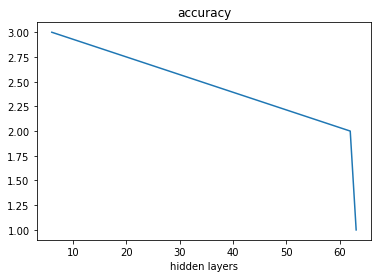

In [0]:
x = [63.087346,61.975683,6] 
# corresponding y axis values 
y = [1,2,3] 
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('hidden layers') 
# naming the y axis 
plt.ylabel('') 
  
# giving a title to my graph 
plt.title('accuracy') 

In [0]:
hist = model.fit(X_train,Y_train,epochs = 1 , batch_size = 500, validation_data = (X_test,Y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 4212 samples, validate on 1054 samples
Epoch 1/2


ResourceExhaustedError: ignored

In [0]:
result = model.evaluate(X_test,Y_test)
print(result[1]*100)


In [0]:
def prepare_submission():
    test = pd.read_csv('/content/drive/My Drive/Data_4/f6eb0bd7-6063-4e50-baa0-111feda638fb_test.csv')
    clean = cleaning()
    test_data = clean.All_clean(test)
    test_data = test_data['text']
    tokenizer.fit_on_texts(test_data)
    seq = tokenizer.texts_to_sequences(test_data)
    test_final = pad_sequences(seq, maxlen = max_seq_len )
    test_final = np.array(test_final).astype(np.float32)
    print(test_final.shape)
    result_final = model.predict_classes(test_final)
    Y_data = pd.read_csv('/content/drive/My Drive/Data_4/3c41266b-1527-4f61-b489-1357bb886bb2_sample_submission.csv')
    y_true = Y_data['labels'].values
    return result_final,y_true.flatten()
y_pred,y_true = prepare_submission()


(586, 10000)


In [0]:
print(y_pred)
print(y_true)


[1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1
 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1
 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0
 1 0 1 1 0 0 1 0 1 1 1 1 

In [0]:
print(pd.Series(y_true).value_counts()) 
print(pd.Series(y_pred).value_counts())

0    568
1     18
dtype: int64
1    423
0    163
dtype: int64


In [0]:
y = pd.DataFrame(y_pred, columns=['labels'])
y.to_csv('submission_glove.csv', header=True, index=False) 

In [0]:
print('accuracy :', accuracy_score(y_true, y_pred))


accuracy : 0.2986348122866894


In [0]:
A = pd.read_csv('/content/submission_glove.csv')
   

In [0]:
print(A.shape)

(586, 1)
